Reconhecimento de dígitos com deep learning

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Text(0.5, 1.0, '0')

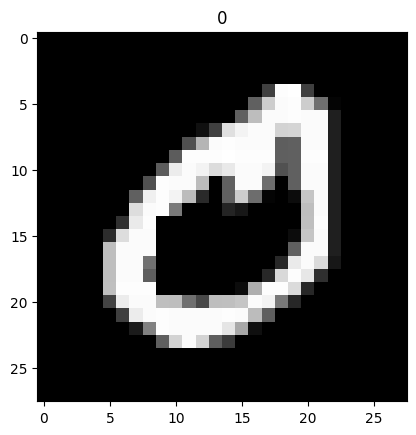

In [4]:
(X_treinamento, y_treinamento), (X_validation, y_validation) = mnist.load_data()

plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

In [5]:
#Alteração de matriz para vetor
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_validation = X_validation.reshape((len(X_validation), np.prod(X_validation.shape[1:])))
X_validation[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
#normalização dos dados passando primeiro para float
X_treinamento = X_treinamento.astype('float32')
X_validation = X_validation.astype('float32')

In [ ]:
# 255 valor maximo de pixel
X_treinamento /= 255
X_validation /=255

In [7]:
#transformando em variavel dummy
y_treinamento = to_categorical(y_treinamento, 10)
y_validation = to_categorical(y_validation, 10)
y_validation[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

c:\CursosUdemy\Formacao Cientista de Dados\udemyvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_treinamento, y_treinamento, epochs=20,
                    validation_data = (X_validation, y_validation))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2850 - loss: 6.1905 - val_accuracy: 0.6656 - val_loss: 0.9672
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6543 - loss: 1.0822 - val_accuracy: 0.8934 - val_loss: 0.4585
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7953 - loss: 0.7128 - val_accuracy: 0.9117 - val_loss: 0.3792
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8314 - loss: 0.5900 - val_accuracy: 0.9182 - val_loss: 0.3386
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8564 - loss: 0.5181 - val_accuracy: 0.9258 - val_loss: 0.2912
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8743 - loss: 0.4671 - val_accuracy: 0.9283 - val_loss: 0.2764
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8782 - loss: 0.4384 - val_accuracy: 0.9338 - val_loss: 0.2677
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8890 - loss: 0.4069 - 

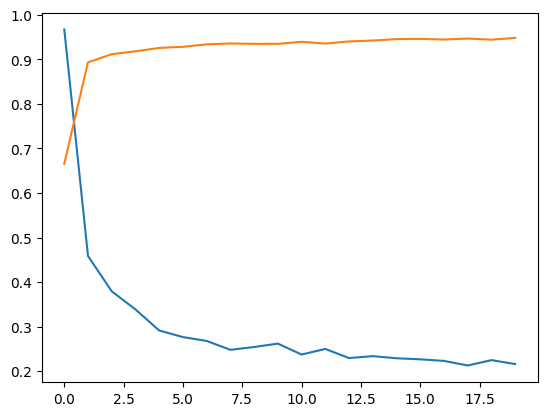

In [12]:
history.history.keys()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

In [13]:
previsions = model.predict(X_validation)
previsions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.8087502e-12, 2.8614886e-08, 2.5927453e-05, ..., 9.9994683e-01,
        2.2677010e-10, 2.1986245e-05],
       [6.2616888e-13, 2.5999116e-08, 9.9999905e-01, ..., 7.4208401e-08,
        3.3865000e-10, 6.9828540e-30],
       [2.3363815e-28, 1.0000000e+00, 1.6491963e-19, ..., 6.7714321e-14,
        1.3718634e-11, 2.9937976e-22],
       ...,
       [3.2202073e-04, 2.3059400e-05, 1.1679235e-02, ..., 1.5538384e-03,
        2.9266386e-07, 1.8476499e-02],
       [1.3965976e-28, 1.0105109e-23, 3.7735475e-28, ..., 3.6568027e-22,
        1.0504205e-15, 6.4405950e-12],
       [3.4529023e-13, 1.5413109e-21, 4.2656257e-14, ..., 5.1260868e-22,
        2.9464872e-12, 2.4382065e-29]], dtype=float32)

In [14]:
y_validation_matriz = [np.argmax(t) for t in y_validation]
y_previsions_matriz = [np.argmax(t) for t in previsions]

confusion = confusion_matrix(y_validation_matriz, y_previsions_matriz)
confusion

array([[ 970,    0,    0,    2,    0,    1,    2,    1,    4,    0],
       [   0, 1118,    2,    1,    0,    1,    2,    2,    9,    0],
       [   6,    0,  974,    8,    4,    0,    7,   10,   20,    3],
       [   2,    0,   20,  940,    2,    3,    0,   12,   24,    7],
       [   3,    0,    6,    0,  912,    0,   10,    3,   12,   36],
       [   7,    0,    1,   31,    2,  794,   15,    1,   34,    7],
       [  13,    3,    1,    0,    4,    3,  921,    0,   13,    0],
       [   2,    3,   15,    1,    3,    0,    0,  977,   13,   14],
       [   9,    3,    2,    2,    6,    4,    9,    4,  924,   11],
       [  10,    4,    0,   14,   11,    3,    0,    6,    8,  953]],
      dtype=int64)

In [21]:
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [22]:
novo = X_treinamento[20]
novo = np.expand_dims(novo, axis=0)

pred = model.predict(novo)

pred = [np.argmax(pred) for t in pred]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


[4]